In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# Load dataset
file_path = '/content/drive/MyDrive/Semester 5/Data mining/datasets-jadi.csv'
dataset = pd.read_csv(file_path)

In [21]:
dataset

,NO,NAMA,USIA,PARITAS,JARAK KELAHIRAN,PE/Non PE,RIW HIPERTENSI_Tidak,RIW HIPERTENSI_Ya,RIW PE_Ada,RIW PE_Tidak,OBESITAS_Tidak,OBESITAS_Ya,RIW DM_Tidak,RIW DM_Ya,RIW HIPERTENSI/PE DALAM KELUARGA_Ada,RIW HIPERTENSI/PE DALAM KELUARGA_Tidak,SOSEK RENDAH_<UMR,SOSEK RENDAH_>UMR
0,1,NAMA 1,23.0,3,0,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,2,NAMA 2,29.0,2,0,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,3,NAMA 3,20.0,1,2,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,4,NAMA 4,18.0,1,2,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,5,NAMA 5,34.0,3,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,558,NAMA 557,40.0,3,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
557,559,NAMA 558,28.0,3,0,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
558,560,NAMA 559,41.0,3,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
559,561,NAMA 560,32.0,2,1,0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [22]:
# Menghapus kolom yang tidak diperlukan (misalnya kolom 'NO' dan 'NAMA')
X = dataset.drop(['NO', 'NAMA', 'PE/Non PE'], axis=1)
y = dataset['PE/Non PE']

# Standarisasi semua fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lakukan PCA untuk mengekstraksi komponen utama (misalnya 5 komponen)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# Membuat DataFrame dari hasil PCA
pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])

# Menambahkan target variabel 'PE/Non PE' kembali ke hasil PCA
pca_df['PE/Non PE'] = y


Hasil PCA:
        PC1       PC2       PC3       PC4        PC5  PE/Non PE
0 -0.431453  6.994521  7.797476 -3.590859 -10.125022          0
1 -6.879282 -3.725171  2.497725  2.279068   0.009871          1
2  0.647367 -0.770183 -0.988202 -0.898688  -0.669603          0
3  0.663934 -0.821644 -1.091341 -0.971425  -0.759402          0
4  0.621474  0.488930  1.046330  0.757175   0.774872          0

Explained Variance Ratio (Proporsi varians yang dijelaskan oleh setiap komponen PCA):
PC1: 0.2125
PC2: 0.1455
PC3: 0.1363
PC4: 0.1341
PC5: 0.1275


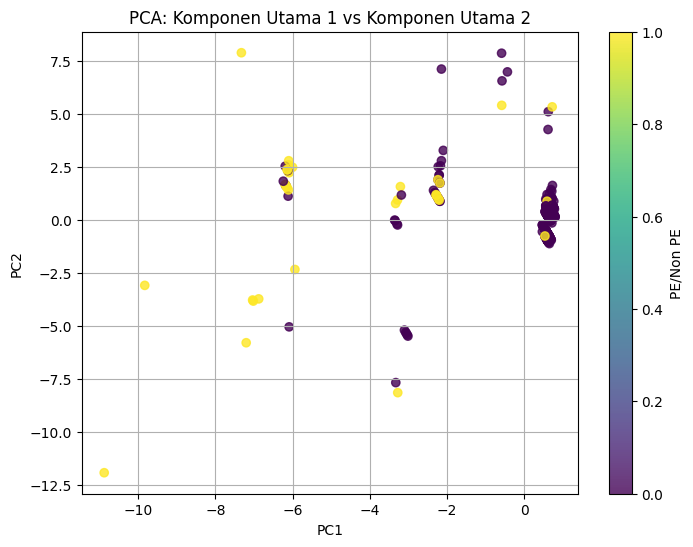

In [23]:
# Menampilkan 5 baris pertama dari hasil PCA
print("Hasil PCA:")
print(pca_df.head())

# Menampilkan informasi varians yang dijelaskan oleh setiap komponen PCA
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance Ratio (Proporsi varians yang dijelaskan oleh setiap komponen PCA):")
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i}: {var:.4f}")

# Visualisasi hasil PCA (PC1 vs PC2) dengan scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['PE/Non PE'], cmap='viridis', alpha=0.8)
plt.colorbar(label='PE/Non PE')
plt.title('PCA: Komponen Utama 1 vs Komponen Utama 2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()


  Feature  Importance
0     PC1    0.420507
1     PC2    0.200566
2     PC3    0.136474
4     PC5    0.126469
3     PC4    0.115984


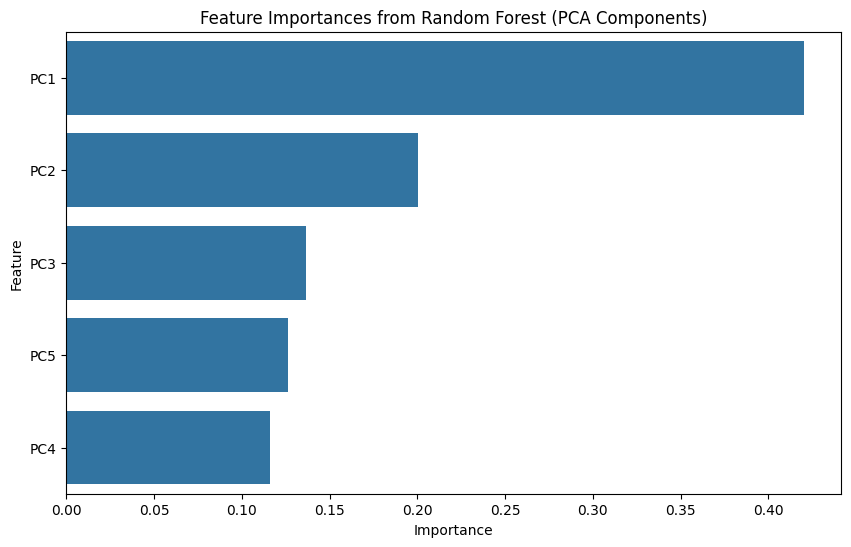

Explained variance ratio by PCA components: [0.21245611 0.14549489 0.13630759 0.13408472 0.12752103]


In [24]:
# Pisahkan data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(pca_df.drop('PE/Non PE', axis=1), y, test_size=0.2, random_state=42)

# Buat model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Mengambil nilai pentingnya fitur dari komponen PCA
feature_importances = rf.feature_importances_

# Membuat DataFrame untuk menyimpan pentingnya fitur
feature_importances_df = pd.DataFrame({
    'Feature': [f'PC{i+1}' for i in range(X_train.shape[1])],
    'Importance': feature_importances
})

# Mengurutkan fitur berdasarkan pentingnya
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Menampilkan fitur penting
print(feature_importances_df)

# Visualisasi pentingnya fitur dengan plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances from Random Forest (PCA Components)')
plt.show()

# Menampilkan proporsi varians yang dijelaskan oleh setiap komponen PCA
print("Explained variance ratio by PCA components:", pca.explained_variance_ratio_)
